# Assignment 1: Regression 
### CS 4262/5262 (Foundations of Machine Learning)<br><br>Vanderbilt University, Spring 2024
---
In this first assignment, you will have a chance to implement linear and polynomial regression models. In addition to programming tasks (marked with #TODO), there are some short-answer questions throughout the notebook. Please do not hesitate to ask for clarification. 

You are expected to clearly comment your code throughout the assignment.

ChatGPT and other online resources may be used to assist you with the programming components. However, (i) the short-answer reflection questions should be done without using such resources; (ii) it is highly recommended that you nonetheless ensure that you are capable of writing all code on your own; and (iii) collaborators and all external resources must be listed at the end of the assignment.

### Please enter your name:  <font color='blue'> Yuanhe Li


---
## Part 1: Dataset
This exercise will draw upon a portion of the California Housing dataset. Using this dataset, we will build models that predict the median price of a house given the average number of rooms.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import random
import sklearn.datasets 

In [2]:
'''
Fetches data of interest:
@return average number of rooms in house (numpy.ndarray), median price of house (numpy.ndarray)
'''
def fetch_housing_data():
    housing_data = sklearn.datasets.fetch_california_housing()
    # Note, we will use only a subset of the data (600 points) in this exercise
    num_rooms = housing_data.data[400:1000,2]
    median_price = housing_data.target[400:1000]
    return num_rooms, median_price 

'''
Renders a simple (x,y) plot. 
@param x (numpy.ndarray) - average number of rooms 
       y (numpy.ndarray) - median price of house 
'''
def simple_plot(x,y):
    plt.scatter(x,y)
    plt.title('California Housing')
    plt.xlabel('Average Number of Rooms')
    plt.ylabel('Median Price (1000s)')
    plt.show()

**Run the two functions above to display a plot of the data. Based on the plot, do you think linear regression will be able to effectively model the data? Why or why not?**

<font color='blue'>
Response: Not quite. I think the shape looks more polynomial than linear because data are clumped towards the bottom left corner, and a few data are towards the top right (they do not generally suggest a line). A polynomial line would take account of the aggregated bottom data while giving a good estimate to the top data.
<br>


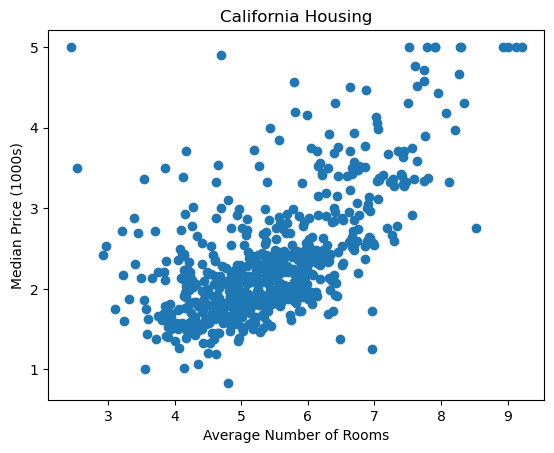

In [3]:
#TODO
# Run the functions here. 
x, y = fetch_housing_data()
simple_plot(x, y)

The `split_train_test()` function below will split the data into a training set and test set. Run the cell (no need to call the function yet). You may also wish to review the definition of overfitting; make sure you understand why it is important to have both training and test sets.

<font color='blue'>
Yea, just to answer that, overfitting occurs when the line fits in the data points too well, so that it cannot reflect the general trend of data. The purpose of creating test sets is to avoid overfitting or underfitting. We test that, with those "unseen" data, is your model still able to predict them well? This test sets make sure our regression result is generally applicable.

In [9]:
'''
Partitions a dataset into a training set and a test set (80/20 split, respectively). 
Shuffles dataset before splitting. 
@param x - data inputs (numpy.ndarray)
       y - data targets (numpy.ndarray)
@return training set inputs, 
        training set targets, 
        test set inputs,
        test set targets (all numpy.ndarray)
'''
def split_train_test(x, y):
    xy = list(zip(x, y))
    random.shuffle(xy)
    x, y = zip(*xy)
    
    split = int(len(x)*0.8)
    train_x = np.array(x[:split])
    train_y = np.array(y[:split])
    test_x = np.array(x[split:])
    test_y = np.array(y[split:])
    
    train_y = np.reshape(train_y, (len(train_y),1))
    test_y = np.reshape(test_y, (len(test_y),1))
    
    return train_x, train_y, test_x, test_y

---
## Part 2: Simple Linear Regression
For the `SimpleLinearRegressionModel` class below, fill in the incomplete methods using their respective descriptions. All methods you should fill out are marked with a #TODO. This model uses a Mean Squared Error cost function and gradient descent to optimize the parameters. 

In [10]:
class SimpleLinearRegressionModel():
    
    '''
    Implementation of simple linear regression using gradient descent
    @param x (numpy.ndarray) - training set of 'single-feature' inputs
           y (numpy.ndarray) - training set of corresponding targets
           theta (numpy.ndarray) - model parameters in the form of [intercept, coefficient]
           alpha (float) - gradient descent step size
    '''
    def __init__(self, x, y, theta, alpha):
        self.x = x
        self.y = y
        self.theta = theta
        self.alpha = alpha
     
    '''
    Equation for the regression line. 
    input x_i (float) - single input feature
    @return corresponding model output (float)
    '''
    #TODO 
    def h(self, x_i):
        return self.theta[0] + x_i * self.theta[1];
    
    '''
    Renders a plot of the training data and the regression line based on current model parameters.
    ''' 
    def plot_current_model(self):
        reg_line_y = [self.h(x_i) for x_i in self.x]
        plt.scatter(self.x, self.y)
        plt.plot(self.x, reg_line_y, color='green')
        plt.title('Housing Dataset')
        plt.xlabel('Average Number of Rooms')
        plt.ylabel('Median Price')
        plt.show()
    
    '''
    Loss function measuring mean squared error of the regression line for a given training set and model parameters. 
    @return MSE based on the current parameters (float)
    '''
    #TODO
    def J(self):
        cost = 0.0
        for i in range(0, len(self.x)):
            cost += (self.h(self.x[i]) - self.y[i])**2
        return cost / (2 * len(self.x))
    
    '''
    Update the model parameters (i.e. the two theta values) for one gradient descent step. Hint: this involves 
    computing partial derivatives. 
    '''
    #TODO
    def gradient_descent_step(self):
        # I did not show the computation of derivatives; I just calculated based 
        # on the result.
        sum_0 = 0.0
        sum_1 = 0.0
        
        for i in range(0, len(self.x)):
            sum_0 += self.h(self.x[i]) - self.y[i]
            sum_1 += (self.h(self.x[i]) - self.y[i]) * self.x[i]
        
        sum_0 /= len(self.x)
        sum_1 /= len(self.x)
        
        self.theta[0] -= self.alpha * sum_0
        self.theta[1] -= self.alpha * sum_1
        
        # Return gradients for checking convergence
        return sum_0, sum_1
        
    '''
    Run gradient descent to optimize the model parameters.
    Keep track of the value of the cost function. You may change the default threshold for convergence.
    @param threshold (float) - run gradient descent until the magnitude of the gradient is below this value. 
    @return a list storing the value of the cost function after every step of gradient descent (float list)
    '''
    #TODO
    def run_gradient_descent(self, threshold=0.001):  # Adjust threshold as needed
        costs = []
        gradients_norm = float('inf')  # Start with an infinitely large value

        while gradients_norm >= threshold:
            # Perform a gradient descent step and get gradients
            gradient_0, gradient_1 = self.gradient_descent_step()

            # Calculate the norm of the gradient vector
            gradients_norm = (gradient_0**2 + gradient_1**2)**0.5

            # Calculate and store the current cost
            current_cost = self.J()
            costs.append(current_cost)


        return costs
    
    '''
    Renders plot of MSE at each iteration of gradient descent
    @param losses (float list) - MSE after every gradient descent step 
    '''
    def plot_MSE_loss(self, losses):
        plt.plot(range(len(losses)), losses)
        plt.title('Learning Curve')
        plt.xlabel('Number of Steps')
        plt.ylabel('MSE Loss')
        plt.show()

Before applying this model to the California housing dataset, let's test your code on a smaller dataset. In the debugging function below, first create a small set of 25 training examples ((x,y) pairs) that have an approximately linear relationship. You can do so by first generating pairs that have a perfect linear relationship, then adding a bit of random noise. Then, run your Simple Linear Regression model on this dataset and display the plot of the final regression line, superimposed on the 25 datapoints (call the `plot_current_model()` method). 

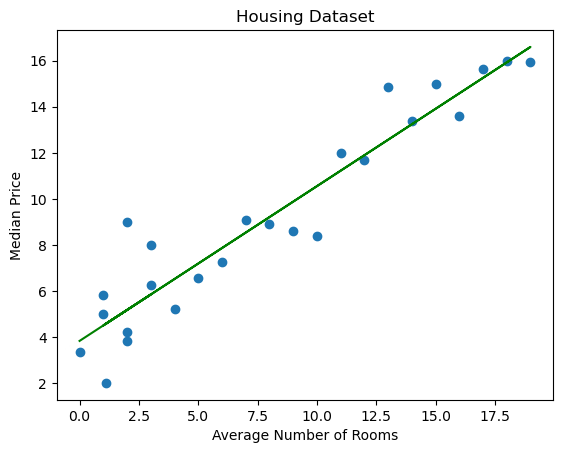

In [11]:
'''
Function for debugging the simple linear regression model.
'''
#TODO


def emit_y(x):
    return 0.7 * x + 3 

def debug_SLR_model():    
    # Linear relationship with a bit of noise
    x = np.array([i for i in range(20)] + [1, 2, 1.1, 3, 2])
    y = np.array([emit_y(xi) + np.random.normal(scale=1) for xi in x[:-5]] + [5, 9, 2, 8, 4.2])

    # Initialize the model
    theta = np.array([1, 0.5])
    model = SimpleLinearRegressionModel(x, y, theta, 0.01)
    
    # Run gradient descent to train the model
    model.run_gradient_descent()

    # Plot the current model
    model.plot_current_model()

debug_SLR_model()

Great, your model looks like it'll work. Next, partition the housing data into a training set and a test set (use the `split_train_test()` function from Part 1). Then, run the training set through new instances of `SimpleLinearRegression`. Try a value within the [$-40$,$-20$] range for $\theta_0$ and a value within the [$0$,$20$] range for $\theta_1$.

Use the `plot_MSE_loss()` method to display the learning curve for three different step sizes (alpha): 0.001, 0.01, and 0.1.

In [12]:
# Assess the different step sizes here (next four cells).
rooms, price = fetch_housing_data()
train_x, train_y, test_x, test_y = split_train_test(rooms, price)

In [13]:
alpha1 = 0.001
#TODO - run an instance of the model and plot the learning curve
theta = np.array([-31.0, 6.0])
model = SimpleLinearRegressionModel(train_x, train_y, theta, alpha1)
losses = model.run_gradient_descent()
model.plot_current_model()
model.plot_MSE_loss(losses)

KeyboardInterrupt: 

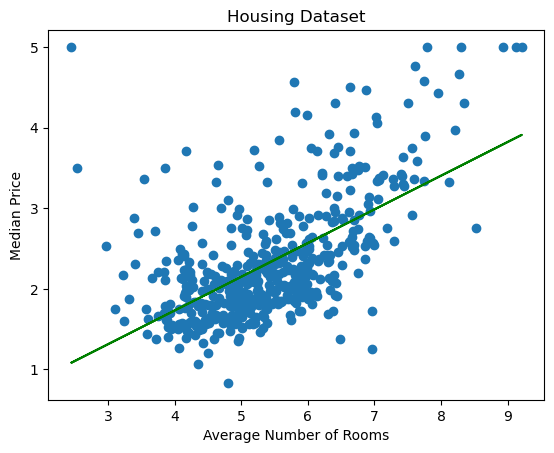

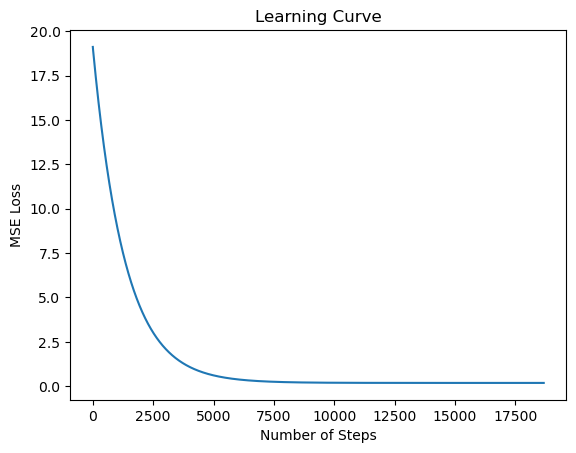

In [9]:
alpha2 = 0.01
#TODO
theta = np.array([-31.0, 6.0])
linear_model = SimpleLinearRegressionModel(train_x, train_y, theta, alpha2)
losses = linear_model.run_gradient_descent()
linear_model.plot_current_model()
model.plot_MSE_loss(losses)

/var/folders/g7/m11wcy9x7rlgn7lf8l51ybg00000gn/T/ipykernel_34803/3302146725.py:45: RuntimeWarning: overflow encountered in add
  cost += (self.h(self.x[i]) - self.y[i])**2
/var/folders/g7/m11wcy9x7rlgn7lf8l51ybg00000gn/T/ipykernel_34803/3302146725.py:88: RuntimeWarning: overflow encountered in square
  gradients_norm = (gradient_0**2 + gradient_1**2)**0.5
/var/folders/g7/m11wcy9x7rlgn7lf8l51ybg00000gn/T/ipykernel_34803/3302146725.py:45: RuntimeWarning: overflow encountered in square
  cost += (self.h(self.x[i]) - self.y[i])**2
/var/folders/g7/m11wcy9x7rlgn7lf8l51ybg00000gn/T/ipykernel_34803/3302146725.py:61: RuntimeWarning: overflow encountered in add
  sum_1 += (self.h(self.x[i]) - self.y[i]) * self.x[i]
/var/folders/g7/m11wcy9x7rlgn7lf8l51ybg00000gn/T/ipykernel_34803/3302146725.py:67: RuntimeWarning: invalid value encountered in subtract
  self.theta[1] -= self.alpha * sum_1


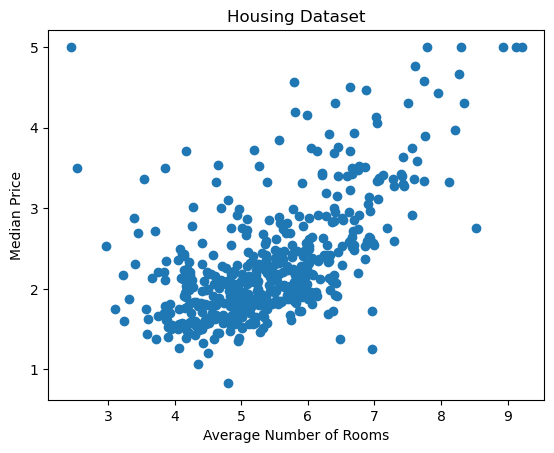

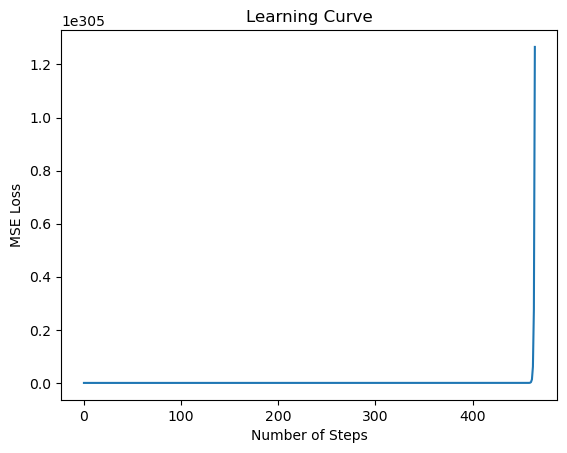

In [10]:
alpha3 = 0.1
#TODO
theta = np.array([-31.0, 6.0])
model = SimpleLinearRegressionModel(train_x, train_y, theta, alpha3)
losses = model.run_gradient_descent()
model.plot_current_model()
model.plot_MSE_loss(losses)

<font color='blue'>
OOPS, this one diverges. This is because when we're oscillating along the gradient function to find the minimum, the parameters changes too much. It amplifies the error causing it eventually diverges.

Based on your experiments, report a value of alpha and an initial value of $\theta$ that allowed gradient descent to find a good solution (i.e., parameters $\theta$ that fit the training data well) in a reasonable amount of time. Next, using the `h(x)` method together with your trained model, predict the target values of the test set ('median price') based on the input features of the test set ('average number of rooms'). Finally, for each datapoint in the test set, display a scatter plot of 'average number of rooms' (x-axis) against both the actual 'median house price' value and the model's prediction (y-axis).

Use different colors for the actual vs. predicted values. Include a legend, title, and axis labels (see `simple_plot()` from Part 1 for example code). 

In [11]:
# Evaluate model on test data here (next two cells). 

'''
Make predictions for inputs using a trained SLR model. 
@param model (SimpleLinearRegression) - SLR model with (ideally) optimized parameters
       test_x (numpy.ndarray) - inputs to run through the model 
@return corresponding predictions for the inputs (numpy.ndarray)
'''
#TODO
def SLR_predict(model, test_x):
    predictions = []
    for x in test_x:
        predictions.append(model.theta[0] + x * model.theta[1])
    return predictions

'''
Renders a plot showing the actual vs SLR-predicted outputs for a set of inputs. 
@param test_x (numpy.ndarray) - model inputs
       test_y (numpy.ndarray) - corresponding actual outputs 
       pred_y (numpy.ndarray) - corresponding predicted outputs
'''
#TODO
def plot_actual_vs_pred(test_x, test_y, pred_y):
    plt.figure(figsize=(10, 6))
    plt.scatter(test_x, test_y, color='blue', label='Actual')
    plt.scatter(test_x, pred_y, color='red', label='Predicted')
    plt.title('Actual vs Predicted Outputs')
    plt.xlabel('Input Features')
    plt.ylabel('Outputs')
    plt.legend()
    plt.show()

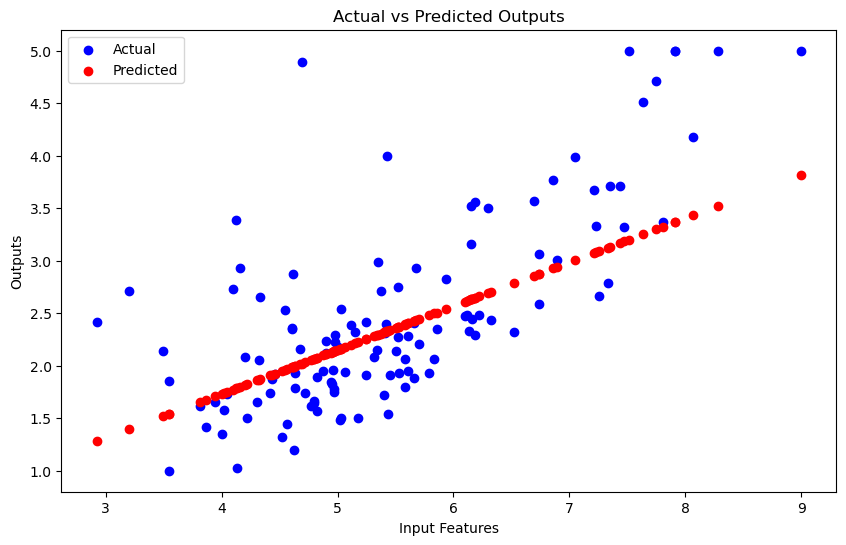

In [12]:
# TODO
theta = np.array([-31.0, 6.0])
alpha = 0.01 

slr = SimpleLinearRegressionModel(train_x, train_y, theta, alpha)
losses = slr.run_gradient_descent()
pred_y = SLR_predict(slr, test_x)
plot_actual_vs_pred(test_x, test_y, pred_y)

---
## Part 3: Polynomial Regression 

In Part 2, we modeled the data with a linear function. Now, we will build a polynomial regression model and apply it to the same housing dataset. We will implement gradient descent, and vectorize operations whenever possible.

In class, we learned that the gradient descent update rule can be written as:
   $\theta := \theta - \alpha \cdot \nabla J(\theta)$,
   and that for Batch Gradient Descent, the $j^{th}$ entry of $\nabla_\theta J(\theta)$ can be expressed as:
 
   $$\sum_{i=1}^m (h_\theta(x^{(i)})-y^{(i)}) \cdot x_j^{(i)} $$

In the `PolynomialRegressionModel` class below, note that there is a new field `self.degree` in the `init()` method, which specifies the highest polynomial degree in your regression equation. For example, if `self.degree=3`, then the regression equation is $y_i = \theta_0 + \theta_1 x_i + \theta_2 x_i^2 + \theta_3 x_i^3$.

At this stage, make sure you understand why polynomial regression be considered a case of multiple linear regression.


<font color='blue'>
    This is because they're doing regressions under the same principle (same matrix form), we are calculating loss function based on the same rule (mean squared error), and we can interpret them similarly as well. It is just that the parameters of polynomial regression are nonlinear.

<br>**First,** complete the function `form_design_matrix()` below. This function should return the design matrix $X$ for polynomial regression, which is a matrix of dimensions $m \times (d+1)$, where $d$ is the degree of the polynomial. Remember to include the intercept term (i.e., append the 'feature' $x_0 = 1$ to each training example, such that the first column of $X$ consists of all 1's. 

In [6]:
'''
Converts an array of training set inputs into a design matrix, where rows represent 
training inputs and columns represent input features. 
@param training_inputs (numpy.ndarray) - training set of input features
       degree (int) - highest polynomial degree to extend the design matrix into
@return design matrix including the x_0 'feature' - (numpy.ndarray)
'''
#TODO
def form_design_matrix(training_inputs, degree):
    m = training_inputs.shape[0]  # Number of training examples
    X = np.ones((m, degree + 1))  # Start with a matrix of ones for the intercept
    
    # Fill in the rest of the matrix with each input raised to the power 1 to degree
    for i in range(1, degree + 1):
        X[:, i] = training_inputs ** i
    
    return X


**Next,** before writing any further code, show that the above expression for the jth entry of the gradient ( = $\sum_{i=1}^m (h_\theta(x^{(i)})-y^{(i)}) \cdot x_j^{(i)} $) indeed corresponds to the jth entry of $\nabla_\theta J(\theta) = X^T(X\theta - y)$. You can write your derivation below using LaTeX, or upload a separate sheet of paper with a hand-written derivation. 


<font color='blue'>Proof. We first have 
$$h_{\theta}(x^{(i)}) = \theta_0x_0 + \cdots + \theta_d x_d = ({x^{(i)}})^{T} \theta$$

 <font color='blue'>With that in mind, we have
$$\sum_{i=1}^{m}(h_{\theta}(x^{(i)}) - y^{(i)}) \cdot x_j^{(i)} = \begin{bmatrix}
x_{j}^{(1)} \\
\vdots \\
x_j^{(m)}
\end{bmatrix}
\cdot
\left(
\begin{bmatrix}
h_{\theta}(x^{(1)}) \\
\vdots \\
h_{\theta}(x^{(m)})
\end{bmatrix}
- 
\begin{bmatrix}
y^{(1)} \\
\vdots \\
y^{(m)}
\end{bmatrix}
\right) = \begin{bmatrix}
x_{j}^{(1)} \\
\vdots \\
x_j^{(m)}
\end{bmatrix}
\cdot
\left(
\begin{bmatrix}
{x^{(1)}}^T \theta \\
\vdots \\
{x^{(m)}}^T \theta)
\end{bmatrix}
- 
\begin{bmatrix}
y^{(1)} \\
\vdots \\
y^{(m)}
\end{bmatrix}
\right) = \begin{bmatrix}
x_{j}^{(1)} \\
\vdots \\
x_j^{(m)}
\end{bmatrix} (X\theta - y)$$
<font color='blue'>
where $\begin{bmatrix}
x_{j}^{(1)} \\
\vdots \\
x_j^{(m)}
\end{bmatrix}$ is $X^T$'s j-th entry. Hence, $X^T(X\theta - y)$'s j-th entry is this summation expression.</font>

**Then,** complete the methods in the `PolynomialRegressionModel` class using vectorization. Assume that the model's training input will be in the form of a design matrix. A lot of your SLR code can be copied over to this new class— modify your methods accordingly to work for any $d$-degree polynomial. 

In [14]:
class PolynomialRegressionModel():
    
    '''
    Implementation of a Polynomial regression model using MSE and Gradient Descent.
    @param X (numpy.ndarray) - training set of input features, as a design matrix
           y (numpy.ndarray) - training set of corresponding targets
           theta (numpy.ndarray) - model parameters (variable coefficients, in order of increasing variable degree)
           alpha (float) - learning step size
           degree (int) - highest polynomial degree
    '''
    def __init__(self, X, y, theta, alpha, degree):
        self.X = X
        self.y = y
        self.theta = theta
        self.alpha = alpha
        self.degree = degree
             
    '''
    Hypothesis - return model prediction 
    @param X (numpy.ndarray) - design matrix of input features
    @return corresponding model output (numpy.ndarray) 
    '''
    #TODO
    def h(self, X):
        return X @ self.theta
    

    
    '''
    Renders a plot of the training data and the regression line based on current model parameters.
    ''' 
    def plot_current_model(self):
        reg_curve_y = self.h(self.X)
        plt.scatter(self.X[:,1], self.y)
        plt.scatter(self.X[:,1], reg_curve_y, color='green')
        plt.title('California Housing (scaled data)')
        plt.xlabel('Average Number of Rooms')
        plt.ylabel('Median Price')
        plt.show()
    
    '''
    Cost function measuring mean squared error of the regression line for a given training set and model parameters.
    Vectorize your code - no loops!
    @return MSE based on the current parameters (float)
    '''
    #TODO
    def J(self):
        vector = self.h(self.X) - self.y
        return vector * vector / (len(self.X) * 2)
    
    
    '''
    Update theta for one gradient descent step. Vectorize your code - no loops!
    @return the gradient of the cost function (numpy.ndarray), for use in run_gradient_descent
    '''
    #TODO
    def gradient_descent_step(self):
        m = len(self.y)
        diff = self.h(self.X) - self.y
        gradient = np.dot(self.X.T, diff)/ m
        self.theta -= self.alpha * gradient
        return gradient
       
    '''
    Run gradient descent to optimize the model parameters.
    Keep track of the losses. You may change the default threshold for convergence. 
    Here, we will use a convergence criterion based on the norm of the gradient vector.
    @param threshold (float) - run gradient descent until the absolute norm of the gradient is below this value.
    @return a list storing the value of the cost function after every step of gradient descent (float list)
    '''
    def run_gradient_descent(self, threshold=0.001):
        losses = []
        loss = self.J()
        losses.append(loss)
    
        norm_grad_vec = 1
        while norm_grad_vec > threshold:
            grad_vec = self.gradient_descent_step()
            loss = self.J()
            losses.append(loss)
            norm_grad_vec = np.linalg.norm(grad_vec)
        return losses
    
    '''
    Renders the learning curve of the model during its optmization process. 
    @param losses (float list) - MSE after every gradient descent step 
    '''
    def plot_MSE_loss(self, losses):
        plt.plot(range(len(losses)), losses)
        plt.title('Learning Curve')
        plt.xlabel('Number of Steps')
        plt.ylabel('MSE Loss')
        plt.show()

Next, we will run an instance of the `PolynomialRegressionModel` class with a degree of 3. As feature scaling will help our model to converge more quickly, we can first scale our design matrix (normalize each column to have zero mean, unit variance - except for the column of ones). Here, let's set up the design matrix and perform this feature scaling (you can just execute this code, you do not need to write anything here - but make sure you understand what the code is doing). The resulting scaled design matrix will be your input to `PolynomialRegressionModel` in the next part.

In [15]:
degree = 3
design_mat = form_design_matrix(train_x, degree)
Xz = sc.stats.zscore(design_mat[:,1:]) # scale *except* for the column of ones
m = Xz.shape[0]
ones_vec = np.ones((m,1))
design_mat_scaled = np.hstack((ones_vec,Xz))

**Now,** run an instance of the `PolynomialRegressionModel` class using this design matrix. Experiment with the parameter 'alpha' and the initial value of the vector 'theta'. Plot the data and resulting regression curve using the method `plot_current_model`. 

In [18]:
print(train_y)
type(train_y)

[[1.793  ]
 [1.448  ]
 [2.089  ]
 [1.573  ]
 [2.345  ]
 [3.324  ]
 [2.207  ]
 [1.779  ]
 [1.846  ]
 [2.56   ]
 [1.987  ]
 [1.962  ]
 [3.341  ]
 [1.726  ]
 [2.927  ]
 [2.157  ]
 [3.     ]
 [2.242  ]
 [2.592  ]
 [2.75   ]
 [2.5    ]
 [2.422  ]
 [1.789  ]
 [1.688  ]
 [1.791  ]
 [1.375  ]
 [3.324  ]
 [3.846  ]
 [1.875  ]
 [3.524  ]
 [1.941  ]
 [4.     ]
 [1.643  ]
 [1.625  ]
 [1.731  ]
 [1.583  ]
 [1.543  ]
 [5.00001]
 [1.837  ]
 [3.44   ]
 [1.479  ]
 [2.027  ]
 [1.022  ]
 [1.982  ]
 [2.876  ]
 [1.699  ]
 [1.577  ]
 [2.079  ]
 [2.476  ]
 [1.578  ]
 [1.736  ]
 [1.872  ]
 [2.992  ]
 [2.729  ]
 [1.647  ]
 [4.896  ]
 [1.514  ]
 [1.947  ]
 [1.625  ]
 [3.709  ]
 [1.799  ]
 [2.479  ]
 [2.697  ]
 [2.256  ]
 [1.563  ]
 [2.469  ]
 [1.957  ]
 [1.75   ]
 [3.416  ]
 [1.904  ]
 [1.535  ]
 [1.924  ]
 [2.284  ]
 [2.19   ]
 [4.31   ]
 [1.668  ]
 [1.2    ]
 [1.5    ]
 [3.711  ]
 [1.75   ]
 [2.055  ]
 [3.011  ]
 [0.833  ]
 [2.027  ]
 [1.679  ]
 [1.75   ]
 [1.737  ]
 [2.848  ]
 [2.173  ]
 [2.401  ]
 [1.599  ]

numpy.ndarray

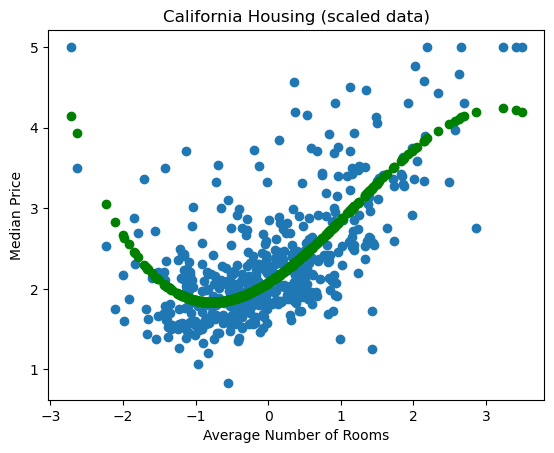

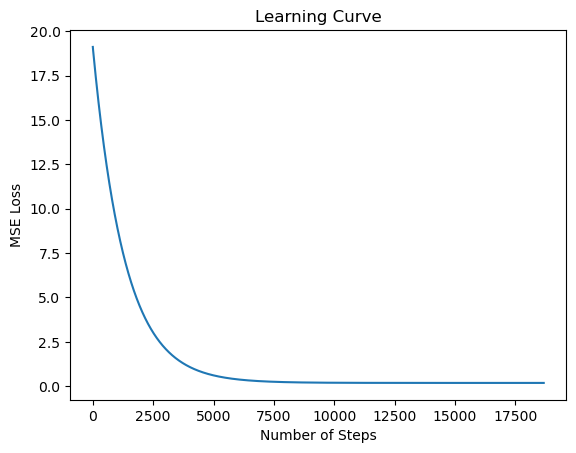

In [16]:
#TODO
# Run an instance of the Polynomial Regression Model with a degree of 3 on the California housing data here. 
theta_init = np.array([20, -80, 160, -80.0]) # here is an example starting point that will converge quickly.
theta_init = np.reshape(theta_init, (degree+1,1))


alpha =0.01
model = PolynomialRegressionModel(design_mat_scaled, train_y, theta_init, alpha, degree)
model.run_gradient_descent()
model.plot_current_model()
model.plot_MSE_loss(losses)


**What do you foresee will happen if you apply this model to the held-out test set?**

<font color='blue'>
Response: It will probably overrate when x-value (num of rooms) is small, and underrate when x-value is large; but for the majority of data sets, it will pretty accurately predict the values (except when it's an outlier for the y-axis). 

<br>


**Lastly,** as an alternative to running gradient descent for linear regression, one can solve directly for the value of $\theta$ that minimizes the least-squares cost function $J(\theta)$, using the equation:
$$ \theta = (X^T X)^{-1} X^T y $$

Please fill in the method `closed_form_solution()` below, using this equation. Run this using the feature-scaled design matrix constructed above, and report the value of $\theta$ it returns, and compare it to the solution you obtained using gradient descent. 

Note:  your predictions will be the same regardless of whether you use the scaled or non-scaled version of the design matrix (optionally, you can check this on your own!). However, for the sake of comparing the values of $\theta$, you can use the feature-scaled design matrix here.

In [17]:
'''
Equation for directly solving for theta which minimizes the least-squares cost function J(theta).
@param X (numpy.ndarray) - model input in the form of a design matrix 
       y (numpy.ndarray) - model output 
@return set of theta values for the regression equation that minimizes J(theta) (numpy.ndarray)
'''
#TODO 
def closed_form_solution(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y

In [18]:
#TODO - run closed_form_solution()
print(closed_form_solution(design_mat_scaled, train_y))
print(model.theta)

[[ 2.31986054]
 [-5.1922949 ]
 [ 9.53943117]
 [-3.94878787]]
[[ 2.31986054]
 [-7.90307915]
 [15.01780796]
 [-6.7669599 ]]


**Gradient descent theta compared to closed-form solution theta:**<br>

<font color='blue'>
Response:  closed-form solution thetas vary less than gradient descent. Both solutions have the same intercept term, and the positive/negativity of each theta is the same. The results are different, because by nature gradient descent is a iterative method, so marginal errors are allowed to occur; closed form solution provides the exact solution. Also, it is possible that gradient descent algorithm found a suboptimal solution (local minimum but not global), hence casuing the deviation.
<br>


Think about potential scenario(s) in which one might choose to use gradient descent over solving the closed-form solution. (no response required)

<font color='blue'>
    Well, if the matrix multiplication takes too long to run, we could use (stochastic) gradient descent. If we do not want the best solution, but just somewhere around it, we can use gradient descent as well.

---
## Part 4: Explore your own dataset 


For this part, you will investigate a dataset of your choosing! Please select a dataset that is suitable for regression analysis. You might choose to download a publicly available dataset, or one that you're using in your research, or one that you have assembled from real-world observations (do not just generate simulated data). Make sure that the dataset contains at least 100 datapoints. If your dataset is very large, you may use a subset of datapoints for this assignment so that the computational load is manageable.

For the questions below, you may call any of the functions you wrote above.

(4.1) Describe the dataset. What is the source of the data? What are some of the features in this dataset, and what target variable might you focus on predicting using regression? (If the dataset has several potential target variables $y$, you are free to select/define one.)

**Response**: 
<font color='blue'>
This is another dataset from sklearn. It is a diabetes dataset found in [here (click me!)](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html). There are 10 input features, including your BMI, sex, etc. The target variable is the progression measure of each diabetes patient. In the regression below, I am interested in the relationship between bmi (feature) vs. progression measure (target).

<br><br>

(4.2) Load the data. Randomly select 75% of the datapoints to serve as the training set; the remaining 25% will comprise the test set.

In [19]:
#TODO - your code here
'''
Fetches data of interest:
@return bmi (numpy.ndarray), progression_measure (numpy.ndarray)
'''
def fetch_diabetes_data():
    data = sklearn.datasets.load_diabetes()
    bmi = data.data[100:300, data.feature_names.index('bmi')]  
    progression_measure = data.target[100:300]  
    return bmi, progression_measure

'''
Renders a simple (x,y) plot. 
@param x (numpy.ndarray) - average number of rooms 
       y (numpy.ndarray) - median price of house 
'''
def simple_plot(x,y):
    plt.scatter(x,y)
    plt.title('BMI vs. Diabetes Progression')
    plt.xlabel('Body Mass Index (BMI)')
    plt.ylabel('Diabetes Progression Measure')
    plt.show()
    

def split_train_test(x, y):
    xy = list(zip(x, y))
    random.shuffle(xy) 

    x, y = zip(*xy)

    # Calculate the split index for 75% of the data
    split = int(len(x) * 0.75)  # Adjusted to 75% for the training set

    # Split the data into training and test sets
    train_x = np.array(x[:split])
    train_y = np.array(y[:split])
    test_x = np.array(x[split:])
    test_y = np.array(y[split:])

    # Reshape the target arrays to ensure they have the correct dimensionality
    train_y = np.reshape(train_y, (len(train_y), 1))
    test_y = np.reshape(test_y, (len(test_y), 1))

    return train_x, train_y, test_x, test_y

(4.3) Choose one particular input feature ($x$), and one target variable ($y$). Using the **training set only**, display a scatterplot of $x$ against $y$, and label the axes.

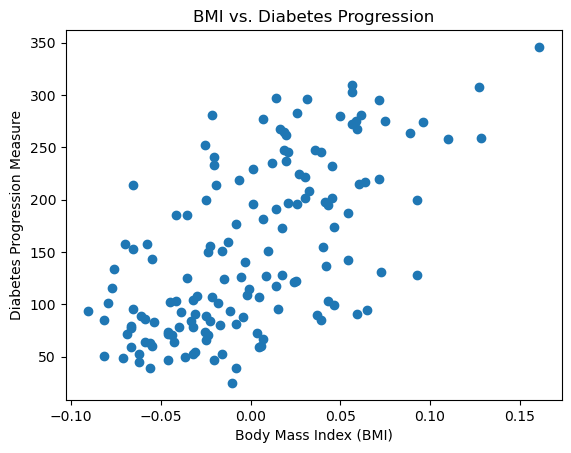

In [20]:
#TODO - your code and plot here
bmi, progression_measure = fetch_diabetes_data()
train_x, train_y, test_x, test_y = split_train_test(bmi, progression_measure)
simple_plot(train_x, train_y)

(4.4) Based on eyeballing your plot, what degree of polynomial do you think might best describe the relationship between $x$ and $y$?

**Response:**<font color='blue'>
I think either degree 1 (linear) or 2 (quadratic) fits the best. If you force me to choose one, I would choose degree 1.
<br>

(4.5) Using your training set, fit a polynomial regression model to this data, using the model order that you estimated above. You may use either gradient descent or the closed-form solution to fit the model. Superimpose the fitted regression curve onto the scatterplot of the training examples.

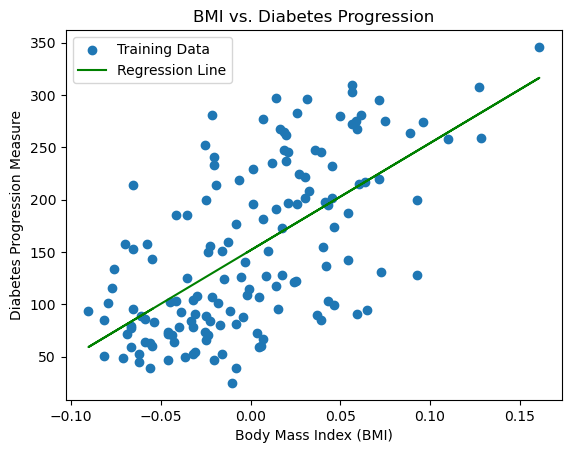

In [21]:
#TODO - your code and plot here
x_values = np.column_stack((np.ones(train_x.shape[0]), train_x))

theta = closed_form_solution(x_values, train_y)

# Calculate the corresponding y values for the regression line
reg_line_y = theta[0] + theta[1] * train_x


# Plot the training data points
plt.scatter(x_values[:, 1], train_y, label='Training Data')  # Use only the BMI values from train_x

# Plot the regression line
plt.plot(x_values[:, 1], reg_line_y, color='green', label='Regression Line')

plt.title('BMI vs. Diabetes Progression')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Progression Measure')
plt.legend()  # Add a legend to explain the plot elements
plt.show()


(4.6) Apply the regression model that you fit in (4.4) to make predictions on each point in the test set. Superimpose the fitted function on a scatterplot of the test set. 

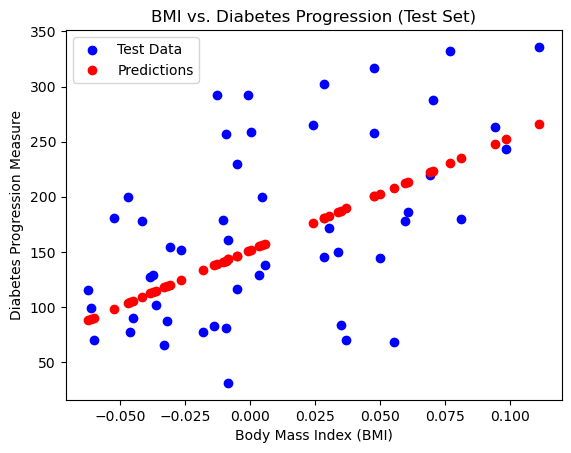

In [22]:
#TODO - your code and plot here

# Reshape test_x.
test_x_reshaped = test_x.reshape(-1, 1)

# Add the intercept term
test_x_with_intercept = np.hstack([np.ones((test_x_reshaped.shape[0], 1)), test_x_reshaped])

# Make predictions.
predictions = test_x_with_intercept @ theta

# Plot the test data points
plt.scatter(test_x, test_y, label='Test Data', color='blue')

# Plot the regression predictions
plt.plot(test_x, predictions, 'ro', label='Predictions', linestyle='none')

plt.title('BMI vs. Diabetes Progression (Test Set)')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Progression Measure')
plt.legend()
plt.show()

(4.7) How well did your model appear to fit the data? Calculate and report the mean-squared error on the test set. In addition, experiment with increasing and decreasing the model order, and describe what happens to the training and test error.

<font color='blue'> I think it's pretty good. The data itself is quite scattered, but let's try it with degree 2 and see if it looks better.

In [23]:
def calculate_mse(true_values, predicted_values):
    # Calculate the squared differences
    squared_diffs = (true_values - predicted_values) ** 2

    # Calculate the mean of the squared differences
    mse = np.mean(squared_diffs)

    return mse

print("The MSE is" , calculate_mse(test_y, predictions))

The MSE is 4953.516366715912


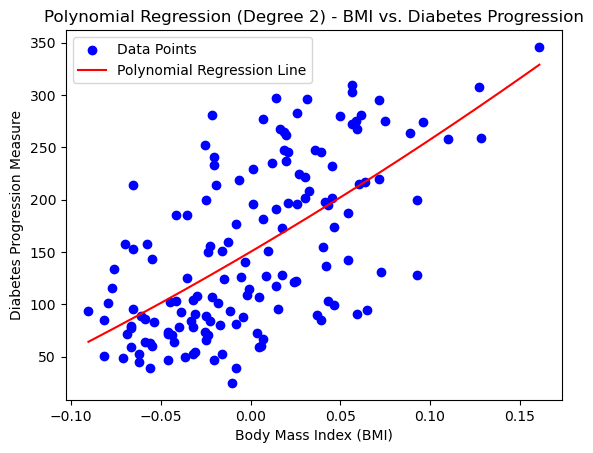

In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_diabetes

degree = 2
poly_features = PolynomialFeatures(degree=degree)
x_values_poly = poly_features.fit_transform(x_values)


poly_regression_model = LinearRegression()

poly_regression_model.fit(x_values_poly, train_y)

theta_0 = poly_regression_model.intercept_
theta_1 = poly_regression_model.coef_[1:]

x_plot = np.linspace(train_x.min(), train_x.max(), 150).reshape(-1, 1)
x_plot_new = np.hstack([np.ones((x_plot.shape[0], 1)), x_plot])
x_plot_poly = poly_features.transform(x_plot_new)
y_plot = poly_regression_model.predict(x_plot_poly)

# Plot the polynomial regression line
plt.scatter(train_x, train_y, color='blue', label='Data Points')
plt.plot(x_plot, y_plot, color='red', label='Polynomial Regression Line')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Progression Measure')
plt.title('Polynomial Regression (Degree 2) - BMI vs. Diabetes Progression')
plt.legend()
plt.show()


<font color='blue'> It doesn't make too much of a difference, honestly. So, I'd stick to the linear regression model.

---
## Part 5: Submission and resource declaration

Once you're ready to submit, create a 'clean' version of your final solutions, removing any extra debugging code you may have written. Next, in the menu bar, click `Kernel > Restart & Clear Output`. Then run your code from top to bottom, so that all the plots are displayed. Back in the menu bar, click `File > Download as > Notebook (.ipynb)` to download your notebook. Don't forget to answer the short answer questions. 

Please upload this to Brightspace by midnight of the deadline. 

### Collaborators and resources
Please list all collaborators and external resources here: 
<font color='blue'>
    ChatGPT (very helpful), LaTeX official documentation, a lot of Python tutorials, the Python online compiler, and the sklearn Diabetes dataset (linked above).